<a href="https://colab.research.google.com/github/kurav/CMPE257-Fall23-Varshith-Kura/blob/class-activities/PLA_and_Pocket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [603]:
import matplotlib.pyplot as plt
import numpy as np

w0, w1, w2 = 1, 0, 1
best_w0, best_w1, best_w2 = w0, w1, w2

temp0,temp1,temp2 = 1,0,1

x1, x2, y = [], [], []
x11,x22,y22 = [],[],[]


In [604]:
def file_read(filename):
    with open(filename, 'r') as file:
        trash = file.readline()
        for line in file:
            values = line.strip().split(',')
            x1.append(float(values[0]))
            x2.append(float(values[1]))
            y.append(int(values[2]))
    return x1,x2,y

In [605]:
def misclassified_points():
    return [(x1[i], x2[i], y[i]) for i in range(len(x1)) if (w0 + w1 * x1[i] + w2 * x2[i]) * y[i] <= 0]

In [606]:
def PLA():
    global w0, w1, w2
    for i in range(50):
        misclassified = misclassified_points()
        if not misclassified:
            break
        x1_misclassified, x2_misclassified, y_misclassified = misclassified[0]
        w0 += y_misclassified
        w1 += y_misclassified * x1_misclassified
        w2 += y_misclassified * x2_misclassified


In [607]:
def pocket_algorithm(x1, x2, y):
    w0, w1, w2 = 0.0, 0.0, 0.0
    w_pocket0, w_pocket1, w_pocket2 = w0, w1, w2
    best_misclassifications = len(x1)

    for _ in range(50):
        misclassifications = 0
        for i in range(len(x1)):
            prediction = w0 + w1 * x1[i] + w2 * x2[i]
            if (prediction > 0 and y[i] == -1) or (prediction <= 0 and y[i] == 1):
                misclassifications += 1
                w0 += y[i]
                w1 += y[i] * x1[i]
                w2 += y[i] * x2[i]

        if misclassifications < best_misclassifications:
            w_pocket0, w_pocket1, w_pocket2 = w0, w1, w2

        if misclassifications == 0:
            break

    return (w_pocket0, w_pocket1, w_pocket2)

In [608]:
file_read('synthetic_dataset.csv')
PLA()
best_w_pocket = pocket_algorithm(x1, x2, y)


Weights obtained from PLA --> w0:  21    w1: 10.678992023000006    w2:  11.63060872200001


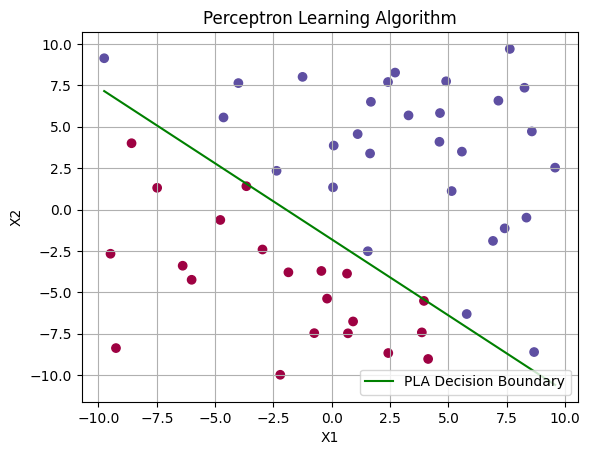

In [609]:
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral)

x1_line_PLA = np.linspace(min(x1), max(x1), 100)
x2_line_PLA = -(w0 + w1 * x1_line_PLA) / w2
plt.plot(x1_line_PLA, x2_line_PLA, label='PLA Decision Boundary',color = 'green')


plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron Learning Algorithm')
plt.grid(True)
plt.legend(loc='lower right')
print("Weights obtained from PLA -->", "w0: ",w0,"   w1:",w1,"   w2: ",w2)
plt.show()


Weights obtained from Pocket --> w0:  27.0    w1: 21.491345929000012    w2:  20.553686088999985


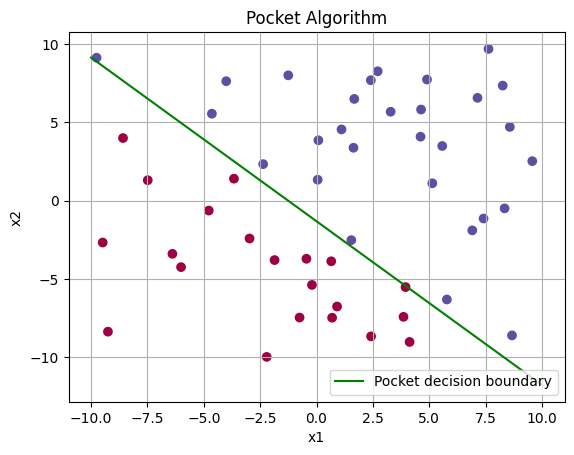

In [610]:
plt.scatter(x1, x2, c=y, cmap=plt.cm.Spectral)

x1_values = [-10, 10]
x2_values = [(-best_w_pocket[0] - best_w_pocket[1] * x1) / best_w_pocket[2] for x1 in x1_values]
plt.plot(x1_values, x2_values, label='Pocket decision boundary', color='green')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc = 'lower right')
plt.title('Pocket Algorithm')
plt.grid(True)
v0,v1,v2 = best_w_pocket
print("Weights obtained from Pocket -->", "w0: ",v0,"   w1:",v1,"   w2: ",v2)
plt.show()
